Executing Grover's algorithm...


C:\Users\ABN\AppData\Local\Temp\ipykernel_8800\2839129547.py:75: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend=simulator, shots=100)


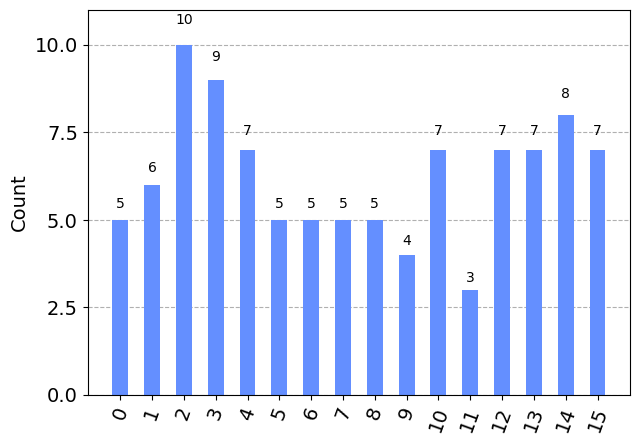

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define the oracle to mark the states representing numbers less than k
def oracle(circuit, k, n):
    # Apply X gates to all qubits to flip the state
    circuit.x(range(n))
    # Apply multi-controlled Toffoli gate to mark states where number < k
    for i in range(n):
        if (i + 1) < k:
            # Create a list of control qubits excluding the current index
            control_qubits = [j for j in range(n) if j != i]
            # Apply multi-controlled Toffoli gate with unique control qubits
            if control_qubits:
                circuit.mcx(control_qubits, i)
    # Apply X gates again to restore the original state
    circuit.x(range(n))


# Define the inversion about the mean operation
def inversion_about_mean(circuit, n):
    # Apply Hadamard gates to all qubits
    circuit.h(range(n))
    # Apply X gates to all qubits to flip the state
    circuit.x(range(n))
    # Apply multi-controlled Z gate (multi-controlled Toffoli gate with X gates)
    circuit.h(n - 1)
    circuit.mcx(list(range(n - 1)), n - 1)
    circuit.h(n - 1)
    # Apply X gates again to restore the original state
    circuit.x(range(n))
    # Apply Hadamard gates again
    circuit.h(range(n))

# Define the function to apply Grover's iteration
def grover_iteration(circuit, k, n, iterations):
    for _ in range(iterations):
        oracle(circuit, k, n)
        inversion_about_mean(circuit, n)

# Define the function to run Grover's algorithm for the "less than k" problem
def less_than_k(k, num_list):
    
    if not num_list:
        raise ValueError("The input list 'num_list' is empty. Please provide a non-empty list.")
    print("Executing Grover's algorithm...")
    # Determine the number of qubits needed based on the maximum number in num_list
    n = len(bin(max(num_list))) - 2
    # Define the number of iterations based on the size of the search space
    iterations = round((3.14 * (2 ** (n / 2))) / 4)
    
    # Create a quantum circuit
    circuit = QuantumCircuit(n, n)
    
    # Apply Hadamard gates to create a superposition of all possible states
    circuit.h(range(n))
    
    # Apply Grover's iteration
    grover_iteration(circuit, k, n, iterations)
    
    # Measure the qubits to obtain the result
    circuit.measure(range(n), range(n))
    
    return circuit

# Define example inputs
k = 7
num_list = [4, 9, 11, 14, 1, 13, 6, 15]

# Create the quantum circuit for the "less than k" problem
circuit = less_than_k(k, num_list)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend=simulator, shots=100)
result = job.result()

# Get counts from measurement outcomes
counts = result.get_counts()

# Map the binary outcomes back to the original numbers
original_numbers = {}
for binary_string, count in counts.items():
    decimal_number = int(binary_string, 2)
    original_numbers[decimal_number] = count

# Plot the histogram of measurement outcomes with original numbers as x-axis
plot_histogram(original_numbers)
